<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/new_project/California_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Introduction
#### Objective
1. Try to predict the the median house prices for California blocks given longitude,latitude neighborhood etc.
2. Use a variety of models to see how well the data, fit and select the model that gives the lowest Mean Absolute Error. 

#### Concepts demonstrated 
* Pipelines and preprocessing
* Grid search and cross validation

In [112]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns

In [113]:
housing=pd.read_csv('drive/MyDrive/Colab Notebooks/housing.csv')

In [ ]:
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13130,-121.32,38.26,4.0,6125.0,1063.0,3077.0,953.0,4.1179,134600.0,INLAND
10349,-117.66,33.60,25.0,3745.0,522.0,1648.0,496.0,7.5488,278100.0,<1H OCEAN
6250,-117.98,34.04,34.0,2547.0,537.0,2108.0,498.0,3.4722,154600.0,<1H OCEAN
17461,-119.88,34.43,14.0,2472.0,685.0,1292.0,621.0,3.3026,229500.0,NEAR OCEAN
17150,-122.20,37.43,40.0,2223.0,412.0,1050.0,417.0,5.2421,444500.0,NEAR OCEAN


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


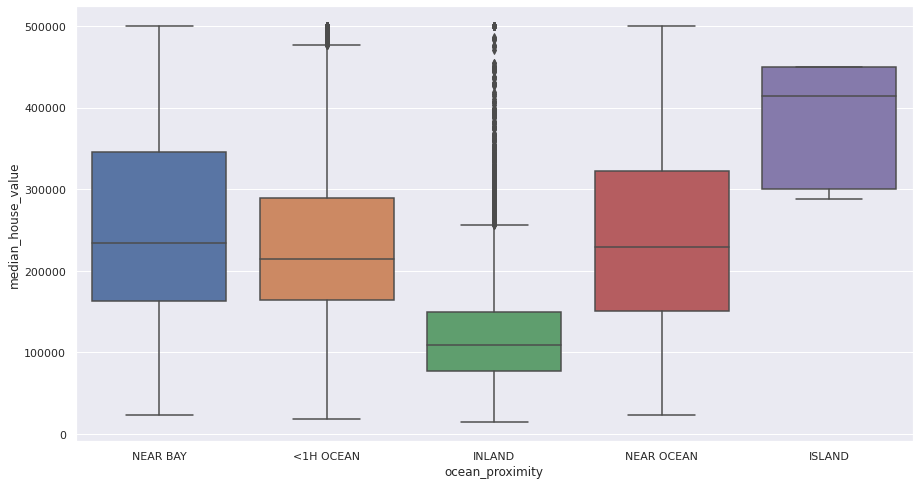

In [ ]:
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.boxplot(y=housing.median_house_value,x=housing.ocean_proximity)
plt.show()

* Clearly the proximity to the ocean makes a difference to the price.
* Inland homes tend to have the lowest values on average.

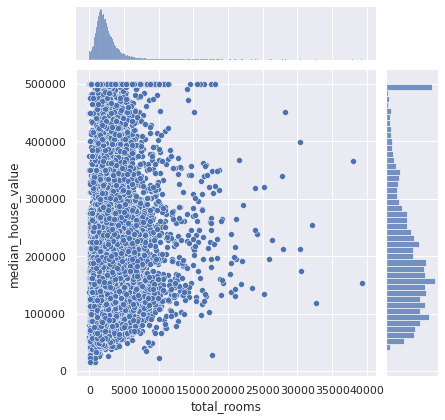

In [ ]:
sns.set_theme(rc={'figure.figsize':(11,12)})
sns.jointplot(x=housing.total_rooms,y=housing.median_house_value)
plt.show()

In [ ]:
housing.housing_median_age.describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [ ]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing['total_bedrooms']=housing.total_bedrooms.fillna(method='ffill')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
housing['ocean_proximity']=le.fit_transform(housing['ocean_proximity'])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [ ]:
from sklearn.model_selection import train_test_split
X=housing.drop(columns='median_house_value')
y=housing.median_house_value
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [ ]:
# Now trying knn Regressor as our first model
knn_pipe=Pipeline([('ss',StandardScaler()),('knn',KNeighborsRegressor())])
params={'knn__n_neighbors':list(range(2,10))}
params
grid_knn=GridSearchCV(knn_pipe,param_grid=params,cv=5,scoring='r2')
grid_knn.fit(X_train,y_train)
print(grid_knn.score(X_train,y_train))
print(grid_knn.best_params_)

0.780537811238476
{'knn__n_neighbors': 9}


In [ ]:
from sklearn.metrics import mean_absolute_error
preds=grid_knn.predict(X_test)
mean_absolute_error(y_test,preds)/y_test.median()

0.22134963561731175

In [114]:
from sklearn.tree import DecisionTreeRegressor
dt_r=DecisionTreeRegressor()
dt_pipe=Pipeline([('ss',StandardScaler()),('dt_r',DecisionTreeRegressor())])
params={'max_depth':[3,4,5,6,7,8,9],
        'min_samples_leaf':[4,5,6,7]}
dt_grid=GridSearchCV(dt_r,param_grid=params,cv=5,scoring='r2')
dt_grid.fit(X_train,y_train)
print(dt_grid.score(X_train,y_train))
print(dt_grid.best_params_)

0.7985338157306672
{'max_depth': 9, 'min_samples_leaf': 6}


In [115]:
preds=dt_grid.predict(X_test)
mean_absolute_error(y_test,preds)/y_test.median()

0.22321063156361592

In [121]:
from sklearn.ensemble import RandomForestRegressor
rf_r=RandomForestRegressor()
params={'max_depth':[3,5,7,9,11],
        'n_estimators':[5,7,9,10,11],
        'max_features':['sqrt','log2']}
rf_grid=GridSearchCV(rf_r,param_grid=params,scoring='r2',cv=5)
rf_grid.fit(X_train,y_train)
print(rf_grid.score(X_train,y_train))

0.8640238079220287


In [122]:
print(rf_grid.best_params_)

{'max_depth': 11, 'max_features': 'log2', 'n_estimators': 10}


In [124]:
preds=rf_grid.predict(X_test)
mean_absolute_error(y_test,preds)/y_test.median()

0.2045097472785989